In [ ]:
# 必要なライブラリをインポート
import pandas as pd
import numpy as np
from google.colab import drive
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Googleドライブをマウント
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Excelファイルのパスを指定
file_path = '/content/drive/MyDrive/分析対象データ'

# Excelファイルを読み込み、データフレームに格納
df = pd.read_excel(file_path + "/cubicと人事評価.xlsx")

In [ ]:
# 評価基準の変換辞書
evaluation_dict = {
    'S': 5,
    'A': 4,
    'B+': 3.5,
    'B': 3,
    'B-': 2.5,
    'C': 2,
    '－': 0
}

# 業績評価の列名を取得
performance_evaluation_columns = ['2022.9期能力評価', '2021.9期能力評価', '2020.9期能力評価']

# 評価を数値に変換
for col in performance_evaluation_columns:
    df[col] = df[col].map(evaluation_dict)

# 業績評価の平均を算出
df['平均業績評価'] = df[performance_evaluation_columns].mean(axis=1)

In [ ]:
# 欠損値または「未入力」を0、それ以外を1に変換
df['配慮事項：理由'] = df['配慮事項：理由'].apply(lambda x: 0 if pd.isnull(x) or x == '未入力' else 1)

In [ ]:
df = df.drop(columns=['社員コード', 'パーソナリティスケッチ', "一般的", '2022.9期業績評価', '2021.9期業績評価', '2020.9期業績評価','2022.9期能力評価', '2021.9期能力評価', '2020.9期能力評価'])
df = df.drop(columns=["管理OR専門職希望",	"異動希望",	"異動先",	"昇格希望か",	"今の仕事にやりがいを感じるか",	"配慮事項",	"配慮事項：理由"])

In [ ]:
# object型のカラムを抽出してinfoを表示
object_columns = df.select_dtypes(include=['object'])
object_columns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Empty DataFrame


In [ ]:
# 欠損値のあるカラムを表示
missing_columns = df.columns[df.isnull().any()]
print("欠損値のあるカラム:")
print(missing_columns)

欠損値のあるカラム:
Index([], dtype='object')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 64 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   信頼係数      545 non-null    int64  
 1   思索型:内閉性   545 non-null    int64  
 2   思索型:客観性   545 non-null    int64  
 3   活動型:身体性   545 non-null    int64  
 4   活動型:気分性   545 non-null    int64  
 5   努力型:持続性   545 non-null    int64  
 6   努力型:規則性   545 non-null    int64  
 7   積極型:競争性   545 non-null    int64  
 8   積極型:自尊心   545 non-null    int64  
 9   自制型:慎重性   545 non-null    int64  
 10  自制型:弱気さ   545 non-null    int64  
 11  積極性       545 non-null    int64  
 12  協調性       545 non-null    int64  
 13  責任感       545 non-null    int64  
 14  自己信頼性     545 non-null    int64  
 15  指導性       545 non-null    int64  
 16  共感性       545 non-null    int64  
 17  感情安定性     545 non-null    int64  
 18  従順性       545 non-null    int64  
 19  自主性       545 non-null    int64  
 20  ﾓﾗﾄﾘｱﾑ傾向  545 non-null    int64 

# 機械学習

In [ ]:
#!pip install tensorflow

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import MeanAbsoluteError
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2

In [ ]:
# 特徴量と目的変数の設定
X = df.drop('平均業績評価', axis=1)
y = df['平均業績評価']

# データの標準化
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
# データの分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

In [ ]:
# モデルの構築
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(16, activation='relu'))
model.add(Dense(1))

# モデルのコンパイル
model.compile(optimizer=Adam(learning_rate=0.001), loss=MeanSquaredError(), metrics=[MeanAbsoluteError()])

In [ ]:
# EarlyStoppingコールバックの設定
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# モデルの訓練
history = model.fit(X_train, y_train, epochs=100, batch_size=16, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/100
22/22 [==============================] - 2s 22ms/step - loss: 5.9355 - mean_absolute_error: 2.1533 - val_loss: 2.3114 - val_mean_absolute_error: 1.3381
Epoch 2/100
22/22 [==============================] - 0s 7ms/step - loss: 4.1529 - mean_absolute_error: 1.6232 - val_loss: 1.7034 - val_mean_absolute_error: 1.1411
Epoch 3/100
22/22 [==============================] - 0s 6ms/step - loss: 2.6520 - mean_absolute_error: 1.3786 - val_loss: 1.2711 - val_mean_absolute_error: 0.9351
Epoch 4/100
22/22 [==============================] - 0s 7ms/step - loss: 2.2019 - mean_absolute_error: 1.2057 - val_loss: 1.1971 - val_mean_absolute_error: 0.8987
Epoch 5/100
22/22 [==============================] - 0s 6ms/step - loss: 2.0965 - mean_absolute_error: 1.2055 - val_loss: 1.1438 - val_mean_absolute_error: 0.8928
Epoch 6/100
22/22 [==============================] - 0s 6ms/step - loss: 1.7850 - mean_absolute_error: 1.1030 - val_loss: 1.0328 - val_mean_absolute_error: 0.8243
Epoch 7/100
22/22 [==

In [ ]:
# モデルの評価
loss, mae = model.evaluate(X_test, y_test)
print(f'Mean Absolute Error on test set: {mae}')

4/4 [==============================] - 0s 5ms/step - loss: 0.1470 - mean_absolute_error: 0.2838
Mean Absolute Error on test set: 0.2837866246700287


In [ ]:
#!pip install pydot
#!pip install graphviz

In [ ]:
from tensorflow.keras.utils import plot_model

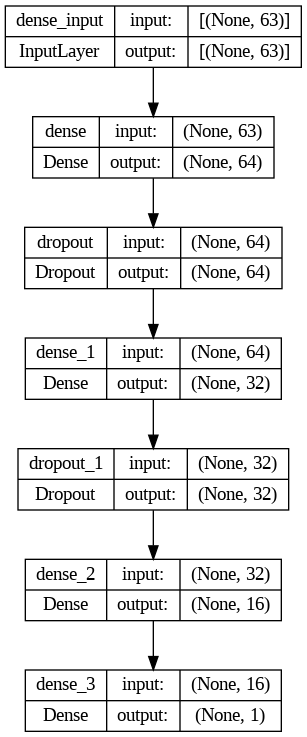

In [ ]:
# モデルの図示
plot_model(model, to_file='model_structure.png', show_shapes=True, show_layer_names=True)

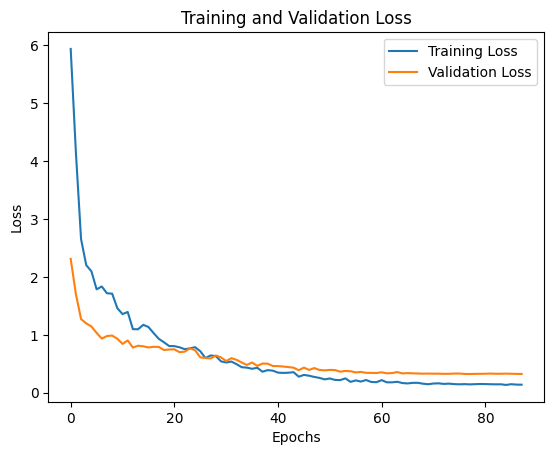

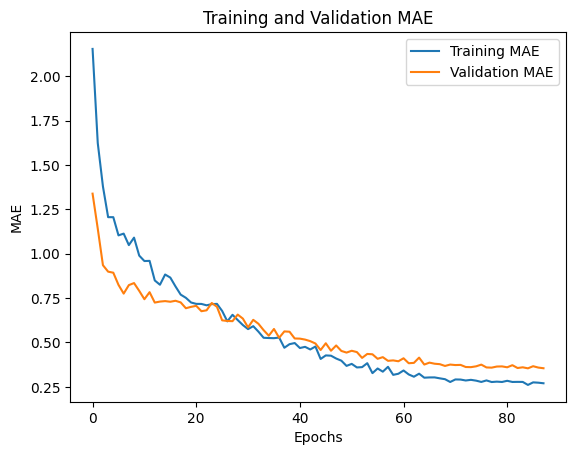

In [ ]:
# 学習曲線のプロット
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(history.history['mean_absolute_error'], label='Training MAE')
plt.plot(history.history['val_mean_absolute_error'], label='Validation MAE')
plt.title('Training and Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()